<h1 style="text-align: center;" markdown="1">Layer Normalization & Add</h1>

### Refered as Add & Norm in NLP

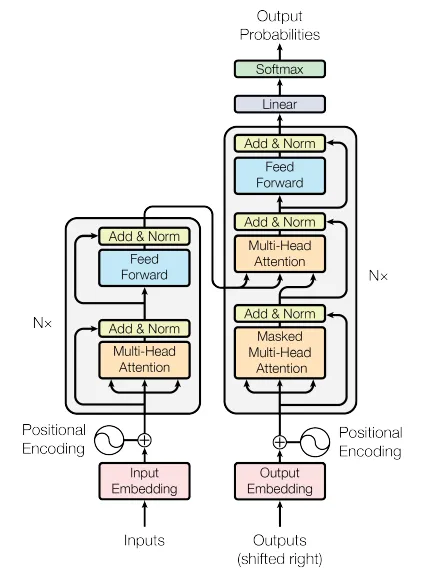

We have two connections to [ADD & NORM]. One is where v X Attention return final output from Multi-head and another is residual connection. These residual connection are there to ensure there are stronger information signals that flows through deep network. This is required because we will notice that during backpropogation there will be vanishing gradients. (gradient updates become zero during back-prop)

_____
So we will add this new V (or Output of M-HA) with X'. Where X' is the matrix which we get after adding positional encoding to emmbeddings.
after this we will normalize this addition.

> So we are doing **ADD** & **NORM**

_____
what normalising does is compat the values of the neuron weights around 0 to get much more stable training by taking even steps during back propgation

> The output of each neuron is activation. These activation can get really large magnitude. This could lead to large training step hence unstable training.

> To matigate this we will normalize these values by subtracting the mean and dividing by S.D of the layer.

In [2]:
import torch
from torch import nn

In [3]:
inputs = torch.Tensor([[[0.2, 0.1, 0.3], [0.5, 0.1, 0.1]]]) # we have added batch dimension also here
B, S, E = inputs.size() # batch, nummber of words, embedding size
inputs = inputs.reshape(S,B,E)
inputs.size() 

torch.Size([2, 1, 3])

Here layer normalization will be commputed across layer and across all the batch

In [5]:
parameter_shape = inputs.size()[-2:]
gamma = nn.Parameter(torch.ones(parameter_shape)) # Initially initialize gamma with ones & beta with zeros
beta = nn.Parameter(torch.zeros(parameter_shape))

In [6]:
gamma.size(), beta.size() # Now we have 1 X 3 dimensional matrix 

(torch.Size([1, 3]), torch.Size([1, 3]))

In [7]:
# compute dimensions for which we want to calculate layer normalization i.e last two layers

dims = [-(i+1) for i in range(len(parameter_shape))]
dims # batch dim and embedding dim

[-1, -2]

In [8]:
mean = inputs.mean(dim=dims, keepdim=True)
mean.size()

torch.Size([2, 1, 1])

In [9]:
mean

tensor([[[0.2000]],

        [[0.2333]]])

In [11]:
var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
epsilon = 1e-5 # to avoid denominator from getting zero i.e std
std = (var +epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [12]:
y = (inputs - mean)/std
y

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [14]:
out = gamma * y +beta
out # grad_fn=<AddBackward0> means this is learnable parameters , so gamma and beta will be updating during backpropogation phase

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

## Class

In [15]:
import torch
from torch import nn

class LayerNormalization():
    def __init__(self, parameter_shape, eps=1e-5): # parameter_shape is the dimensions along which we want to perform the layer norm
        self.parameter_shape= parameter_shape
        self.eps = eps
        self.gamma=nn.Parameter(torch.ones(parameter_shape))
        self.beta=nn.Parameter(torch.zeros(parameter_shape))
    
    def forward(self, input):
        dims = [-(i + 1) for i in range(len(self.parameter_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean \n ({mean.size()}): \n {mean}")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation \n ({std.size()}): \n {std}")
        y = (inputs - mean) / std
        print(f"y \n ({y.size()}) = \n {y}")
        out = self.gamma * y  + self.beta
        print(f"out \n ({out.size()}) = \n {out}")
        return out
                        

In [16]:
batch_size =3
sentence_length =5
embedding_dim =8
inputs = torch.rand(sentence_length, batch_size, embedding_dim)
print(f"input\n ({inputs.size()}) = \n{inputs}")

input
 (torch.Size([5, 3, 8])) = 
tensor([[[0.0725, 0.0960, 0.7232, 0.5372, 0.9528, 0.0232, 0.5910, 0.0919],
         [0.1197, 0.6853, 0.9921, 0.1158, 0.6709, 0.6280, 0.3026, 0.7741],
         [0.3342, 0.3613, 0.0606, 0.0200, 0.1410, 0.2466, 0.2376, 0.2399]],

        [[0.1583, 0.0937, 0.6823, 0.5074, 0.7001, 0.8288, 0.9357, 0.8291],
         [0.1841, 0.3757, 0.9382, 0.6472, 0.1851, 0.0705, 0.0774, 0.3535],
         [0.0498, 0.5242, 0.9285, 0.4821, 0.8605, 0.9796, 0.2528, 0.7473]],

        [[0.4302, 0.7100, 0.7565, 0.9105, 0.0106, 0.8711, 0.4289, 0.6122],
         [0.0604, 0.0438, 0.1812, 0.9922, 0.9104, 0.2712, 0.7042, 0.0438],
         [0.4286, 0.6894, 0.8952, 0.8296, 0.2768, 0.0295, 0.5776, 0.2983]],

        [[0.8854, 0.9888, 0.4955, 0.0026, 0.9864, 0.0664, 0.7685, 0.5623],
         [0.6216, 0.6506, 0.2866, 0.2551, 0.2019, 0.7368, 0.7907, 0.6404],
         [0.2706, 0.4701, 0.0854, 0.4017, 0.0711, 0.7354, 0.6710, 0.4101]],

        [[0.6588, 0.3187, 0.3930, 0.7879, 0.3391, 0.0220, 

In [17]:
layer_norm = LayerNormalization(inputs.size()[-2:])

In [18]:
out = layer_norm.forward(inputs)

Mean 
 (torch.Size([5, 1, 1])): 
 tensor([[[0.3757]],

        [[0.5163]],

        [[0.4984]],

        [[0.5023]],

        [[0.4636]]])
Standard Deviation 
 (torch.Size([5, 1, 1])): 
 tensor([[[0.3002]],

        [[0.3187]],

        [[0.3239]],

        [[0.2915]],

        [[0.2786]]])
y 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-1.0102, -0.9321,  1.1577,  0.5378,  1.9226, -1.1746,  0.7171,
          -0.9456],
         [-0.8531,  1.0315,  2.0534, -0.8661,  0.9833,  0.8406, -0.2434,
           1.3273],
         [-0.1382, -0.0481, -1.0499, -1.1851, -0.7819, -0.4303, -0.4603,
          -0.4524]],

        [[-1.1236, -1.3261,  0.5207, -0.0281,  0.5767,  0.9804,  1.3160,
           0.9815],
         [-1.0424, -0.4412,  1.3239,  0.4108, -1.0394, -1.3990, -1.3774,
          -0.5111],
         [-1.4640,  0.0248,  1.2933, -0.1074,  1.0801,  1.4537, -0.8269,
           0.7247]],

        [[-0.2107,  0.6533,  0.7969,  1.2721, -1.5061,  1.1506, -0.2148,
           0.3512],
         [-1.3524, -1